##Inspecting

In [26]:
import pandas as pd

df = pd.read_csv("hotel_booking_data_cleaned.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
unique_values = df['meal'].unique()
print(unique_values)

In [ ]:
nan_count = df['meal'].isna().sum()
print("Number of NaN values in the column:", nan_count)

In [ ]:
df.info()

In [4]:
df.shape

(119390, 32)

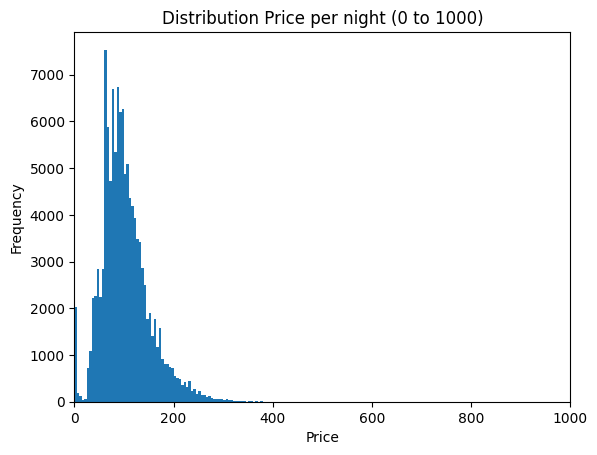

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['adr'], bins=100, range=(0, 500))
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution Price per night (0 to 1000)')
plt.xlim(0, 1000)
plt.show()

##Data Wrangling

In [27]:
# Amending dates in reservation_status_date for ML. extracing weekday
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')
df['weekday_reservation'] = df['reservation_status_date'].dt.day_name()
print(df)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

In [28]:
# Replacing nans in columns children with median
df['children'] = df['children'].fillna(df['children'].median())
nan_count = df['children'].isna().sum()
print(nan_count)

0


In [45]:
df.fillna(0, inplace = True)

In [48]:
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,weekday_reservation


In [47]:
df = df[~filter]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,weekday_reservation
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,No Deposit,0,Transient,0.00,0,0,Wednesday
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,No Deposit,0,Transient,0.00,0,0,Wednesday
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,No Deposit,0,Transient,75.00,0,0,Saturday
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,No Deposit,0,Transient,75.00,0,0,Saturday
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,0,Transient,98.00,0,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,A,0,No Deposit,0,Transient,96.14,0,0,Friday
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,E,0,No Deposit,0,Transient,225.43,0,2,Sunday
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,D,0,No Deposit,0,Transient,157.71,0,4,Sunday
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,A,0,No Deposit,0,Transient,104.40,0,0,Sunday


In [29]:
df['children'] = df['children'].astype(int)

In [30]:
#Columns to pop: company, agent,reservation_status_date
df.pop('company')
df.pop('agent')
df.pop('reservation_status_date')
df.pop('reservation_status')

0         Check-Out
1         Check-Out
2         Check-Out
3         Check-Out
4         Check-Out
            ...    
119385    Check-Out
119386    Check-Out
119387    Check-Out
119388    Check-Out
119389    Check-Out
Name: reservation_status, Length: 119390, dtype: object

In [31]:
# Rename column "adr"
df.rename(columns={'adr': 'average_daily_rate'}, inplace=True)

##Data Transformation

In [32]:
# Numerical DF
numerical_columns = ['lead_time', 'adults', 'children', 'average_daily_rate',
                     'total_of_special_requests', 'stays_in_weekend_nights',
                     'stays_in_week_nights', 'previous_cancellations',
                     'previous_bookings_not_canceled', 'booking_changes',
                     'days_in_waiting_list', 'required_car_parking_spaces']

numerical_df = df[numerical_columns]

In [33]:
# Ordinal DF
ordinal_df = df[['meal','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','reserved_room_type', 'assigned_room_type', 'weekday_reservation']]

In [34]:
ordinal_df['meal'] = ordinal_df['meal'].map({'SC': 0, 'BB': 1, 'HB': 2, 'FB': 3, 'Undefined': 4})
ordinal_df['arrival_date_month'] = ordinal_df['arrival_date_month'].map({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
)
ordinal_df['reserved_room_type'] = ordinal_df['reserved_room_type'].map({chr(i): i - ord('A') + 1 for i in range(ord('A'), ord('P')+1)})
ordinal_df['assigned_room_type'] = ordinal_df['assigned_room_type'].map({chr(i): i - ord('A') + 1 for i in range(ord('A'), ord('P')+1)})
ordinal_df['weekday_reservation'] = ordinal_df['weekday_reservation'].map({'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7})


/var/folders/sf/38y5z2k91sx3rlh15tb__lyw0000gn/T/ipykernel_70262/3788821470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_df['meal'] = ordinal_df['meal'].map({'SC': 0, 'BB': 1, 'HB': 2, 'FB': 3, 'Undefined': 4})
/var/folders/sf/38y5z2k91sx3rlh15tb__lyw0000gn/T/ipykernel_70262/3788821470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_df['arrival_date_month'] = ordinal_df['arrival_date_month'].map({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 

In [15]:
ordinal_df

,meal,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,reserved_room_type,assigned_room_type,weekday_reservation
0,1,2015,7,27,1,3,3,3.0
1,1,2015,7,27,1,3,3,3.0
2,1,2015,7,27,1,1,3,6.0
3,1,2015,7,27,1,1,1,6.0
4,1,2015,7,27,1,1,1,6.0
...,...,...,...,...,...,...,...,...
119385,1,2017,8,35,30,1,1,5.0
119386,1,2017,8,35,31,5,5,7.0
119387,1,2017,8,35,31,4,4,7.0
119388,1,2017,8,35,31,1,1,7.0


In [35]:
# Nominal DF
nominal_df = df[['hotel', 'is_canceled', 'country', 'market_segment', 'distribution_channel','is_repeated_guest','deposit_type','customer_type']]

In [18]:
nominal_df.head()

,hotel,is_canceled,country,market_segment,distribution_channel,is_repeated_guest,deposit_type,customer_type
0,Resort Hotel,0,PRT,Direct,Direct,0,No Deposit,Transient
1,Resort Hotel,0,PRT,Direct,Direct,0,No Deposit,Transient
2,Resort Hotel,0,GBR,Direct,Direct,0,No Deposit,Transient
3,Resort Hotel,0,GBR,Corporate,Corporate,0,No Deposit,Transient
4,Resort Hotel,0,GBR,Online TA,TA/TO,0,No Deposit,Transient


In [36]:
nominal_df = pd.get_dummies(nominal_df)

In [37]:
nominal_df

,is_canceled,is_repeated_guest,hotel_City Hotel,hotel_Resort Hotel,country_ABW,country_AGO,country_AIA,country_ALB,country_AND,country_ARE,...,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,0,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,0,0,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,0,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,0,0,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,0,0,False,True,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,True,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,True,False
119386,0,0,True,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,True,False
119387,0,0,True,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,True,False
119388,0,0,True,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,True,False


In [ ]:
nominal_df

In [39]:
# Concat Dfs
df_combined = pd.concat([ordinal_df, numerical_df, nominal_df], axis=1)

In [40]:
df_combined.head()

,meal,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,reserved_room_type,assigned_room_type,weekday_reservation,lead_time,adults,...,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1,2015,7,27,1,3,3,3.0,342,2,...,False,False,False,True,False,False,False,False,True,False
1,1,2015,7,27,1,3,3,3.0,737,2,...,False,False,False,True,False,False,False,False,True,False
2,1,2015,7,27,1,1,3,6.0,7,1,...,False,False,False,True,False,False,False,False,True,False
3,1,2015,7,27,1,1,1,6.0,13,1,...,False,False,False,True,False,False,False,False,True,False
4,1,2015,7,27,1,1,1,6.0,14,2,...,False,True,False,True,False,False,False,False,True,False


In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Columns: 224 entries, meal to reservation_status_No-Show
dtypes: float64(1), int64(21), uint8(202)
memory usage: 43.0 MB


In [41]:
df_combined.shape

(119390, 221)

In [42]:
df_combined['is_canceled'].unique()

array([0, 1])

In [43]:
df_combined['is_canceled'].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [44]:
df_combined.to_csv('df_ml.csv', index=False)